In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

In [6]:
# Load dataset
df = pd.read_csv("baby-weights-dataset.csv")

In [8]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101400 entries, 0 to 101399
Data columns (total 37 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        101400 non-null  int64  
 1   SEX       101400 non-null  int64  
 2   MARITAL   101400 non-null  int64  
 3   FAGE      101400 non-null  int64  
 4   GAINED    101399 non-null  float64
 5   VISITS    101400 non-null  int64  
 6   MAGE      101400 non-null  int64  
 7   FEDUC     101399 non-null  float64
 8   MEDUC     101400 non-null  int64  
 9   TOTALP    101400 non-null  int64  
 10  BDEAD     101400 non-null  int64  
 11  TERMS     101400 non-null  int64  
 12  LOUTCOME  101400 non-null  int64  
 13  WEEKS     101399 non-null  float64
 14  RACEMOM   101400 non-null  int64  
 15  RACEDAD   101400 non-null  int64  
 16  HISPMOM   101400 non-null  object 
 17  HISPDAD   101400 non-null  object 
 18  CIGNUM    101399 non-null  float64
 19  DRINKNUM  101400 non-null  int64  
 20  ANEM

In [10]:
# Show first few rows
print(df.head())

     ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  ...  \
0  2001    2        1    33    26.0      10    34   12.0      4       2  ...   
1  2002    2        2    19    40.0      10    18   11.0     12       1  ...   
2  2003    2        1    33    16.0      14    31   16.0     16       2  ...   
3  2004    1        1    25    40.0      15    28   12.0     12       3  ...   
4  2005    1        2    21    60.0      13    20   12.0     14       2  ...   

   HYPERCH  HYPERPR  ECLAMP  CERVIX  PINFANT  PRETERM RENAL RHSEN  UTERINE  \
0        0        0       0       0        0        0     0     0        0   
1        0        0       0       0        0        0     0     0        0   
2        0        0       0       0        0        0     0     0        0   
3        0        0       0       0        0        0     0     0        0   
4        0        1       0       0        0        0     0     0        0   

   BWEIGHT  
0   4.3750  
1   6.9375  
2   8.5000 

In [12]:
# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns (e.g., ID)
df.drop(columns=["ID"], inplace=True)

# Convert categorical variables (HISPMOM, HISPDAD) using Label Encoding
label_encoder = LabelEncoder()
df["HISPMOM"] = label_encoder.fit_transform(df["HISPMOM"])
df["HISPDAD"] = label_encoder.fit_transform(df["HISPDAD"])

# Check for duplicates and remove if any
df.drop_duplicates(inplace=True)

# Display cleaned dataset
print(df.info())

ID          0
SEX         0
MARITAL     0
FAGE        0
GAINED      1
VISITS      0
MAGE        0
FEDUC       1
MEDUC       0
TOTALP      0
BDEAD       0
TERMS       0
LOUTCOME    0
WEEKS       1
RACEMOM     0
RACEDAD     0
HISPMOM     0
HISPDAD     0
CIGNUM      1
DRINKNUM    0
ANEMIA      0
CARDIAC     0
ACLUNG      0
DIABETES    0
HERPES      0
HYDRAM      1
HEMOGLOB    0
HYPERCH     0
HYPERPR     0
ECLAMP      0
CERVIX      0
PINFANT     0
PRETERM     0
RENAL       0
RHSEN       0
UTERINE     0
BWEIGHT     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 101398 entries, 0 to 101399
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEX       101398 non-null  int64  
 1   MARITAL   101398 non-null  int64  
 2   FAGE      101398 non-null  int64  
 3   GAINED    101397 non-null  float64
 4   VISITS    101398 non-null  int64  
 5   MAGE      101398 non-null  int64  
 6   FEDUC     101397 non-null  float64
 7 

In [14]:
# Summary statistics
print(df.describe())

                 SEX        MARITAL           FAGE         GAINED  \
count  101398.000000  101398.000000  101398.000000  101397.000000   
mean        1.485670       1.303813      30.174599      30.283283   
std         0.500349       0.459905       6.775564      13.615457   
min         1.000000       1.000000      14.000000       0.000000   
25%         1.000000       1.000000      25.000000      21.000000   
50%         1.000000       1.000000      30.000000      30.000000   
75%         2.000000       2.000000      35.000000      39.000000   
max         9.000000       2.000000      74.000000      98.000000   

              VISITS           MAGE          FEDUC          MEDUC  \
count  101398.000000  101398.000000  101397.000000  101398.000000   
mean       12.437020      27.736385      12.926921      13.256514   
std         3.728864       5.957398       2.926595       2.932703   
min         0.000000      11.000000       0.000000       0.000000   
25%        10.000000      23.0000

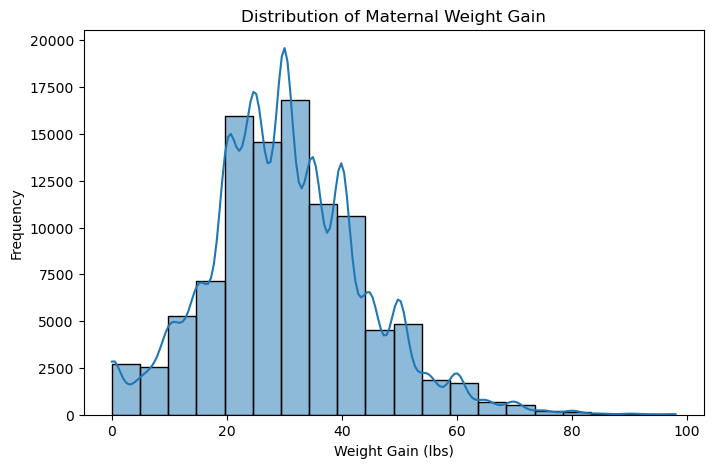

In [16]:
# Distribution of target variable (GAINED)
plt.figure(figsize=(8, 5))
sns.histplot(df["GAINED"], kde=True, bins=20)
plt.title("Distribution of Maternal Weight Gain")
plt.xlabel("Weight Gain (lbs)")
plt.ylabel("Frequency")
plt.show()

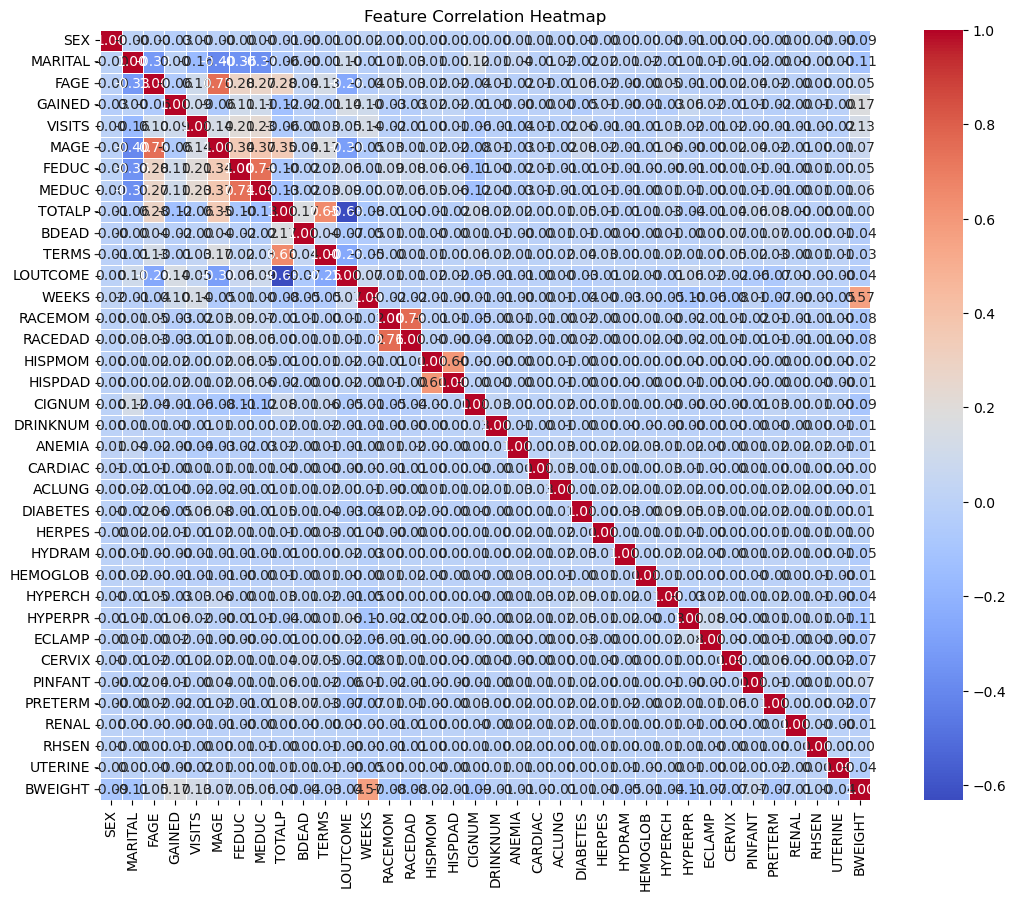

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

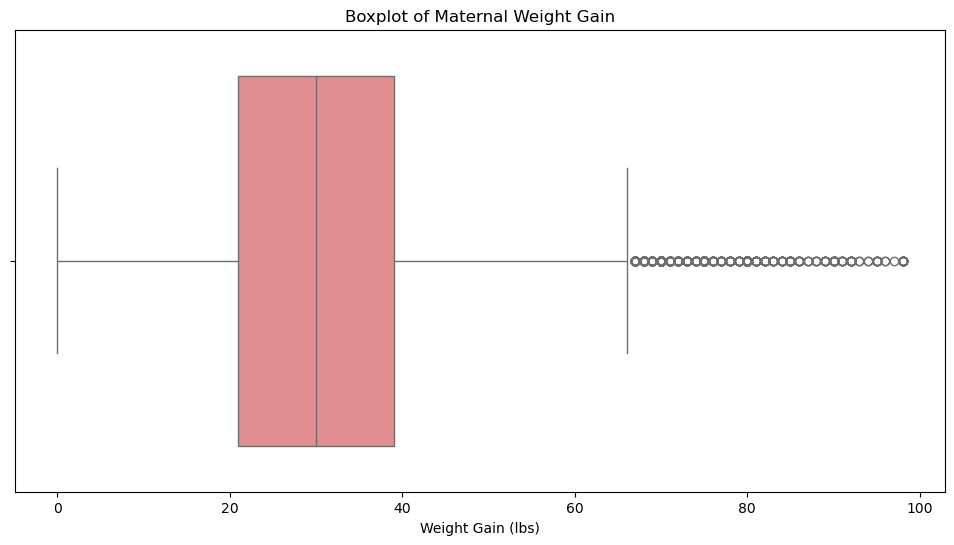

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["GAINED"], color="lightcoral")
plt.title("Boxplot of Maternal Weight Gain")
plt.xlabel("Weight Gain (lbs)")
plt.show()

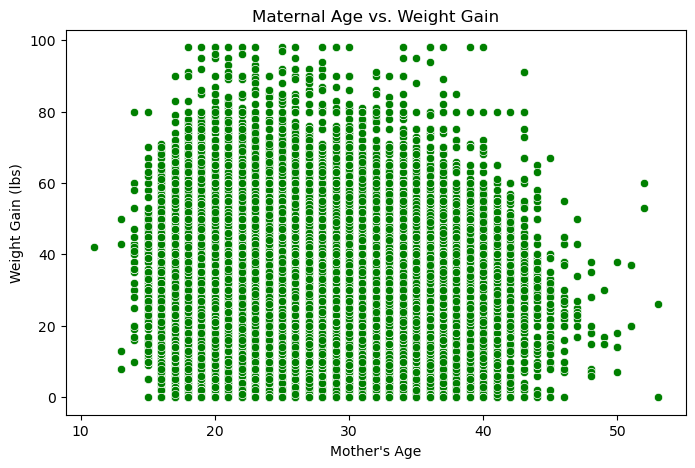

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MAGE"], y=df["GAINED"], color="green")
plt.title("Maternal Age vs. Weight Gain")
plt.xlabel("Mother's Age")
plt.ylabel("Weight Gain (lbs)")
plt.show()

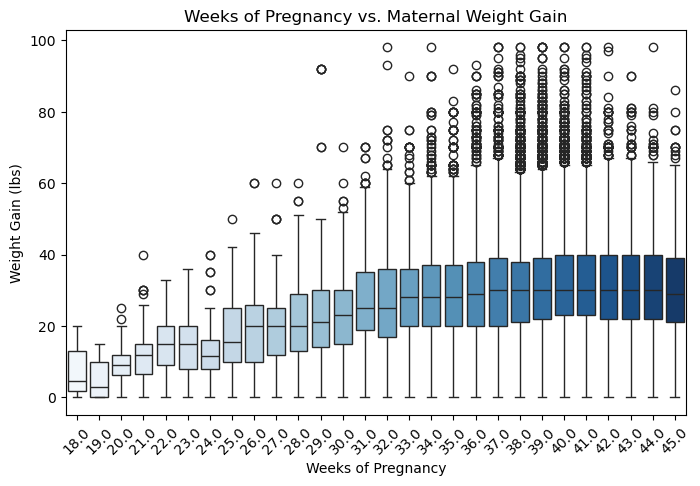

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["WEEKS"], y=df["GAINED"], palette="Blues")
plt.title("Weeks of Pregnancy vs. Maternal Weight Gain")
plt.xlabel("Weeks of Pregnancy")
plt.ylabel("Weight Gain (lbs)")
plt.xticks(rotation=45)
plt.show()

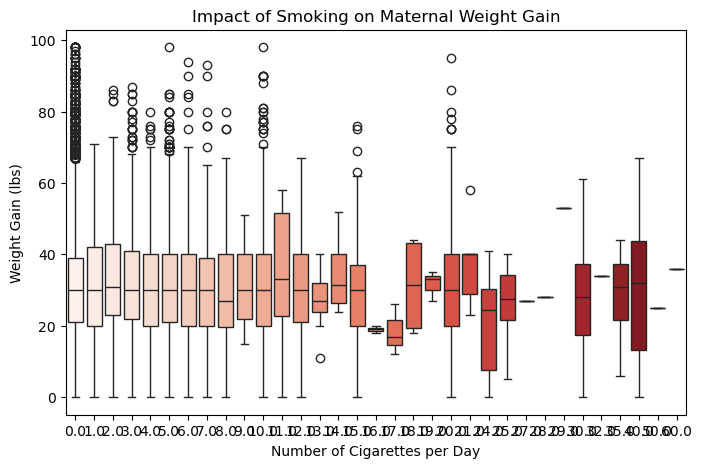

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["CIGNUM"], y=df["GAINED"], palette="Reds")
plt.title("Impact of Smoking on Maternal Weight Gain")
plt.xlabel("Number of Cigarettes per Day")
plt.ylabel("Weight Gain (lbs)")
plt.show()

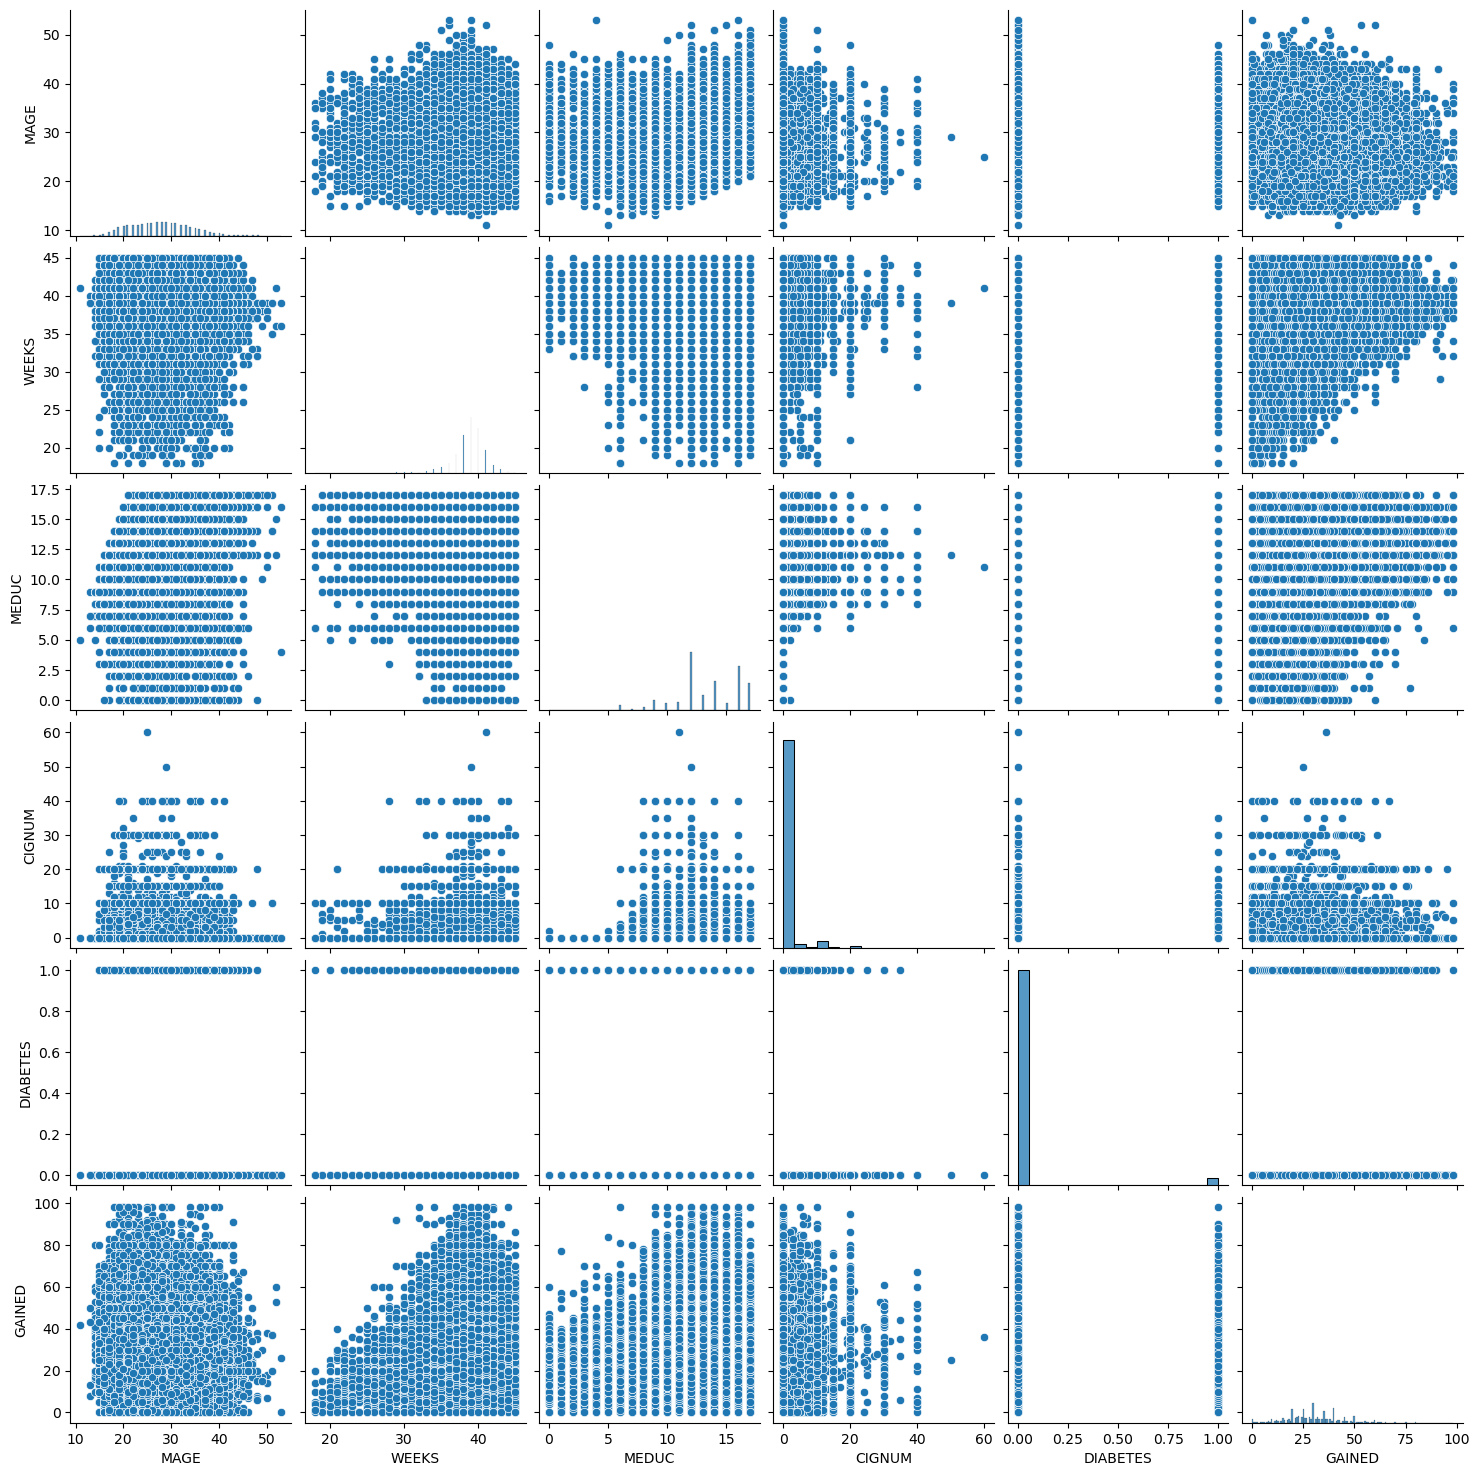

In [30]:
# Pairplot for selected features
selected_features = ["MAGE", "WEEKS", "MEDUC", "CIGNUM", "DIABETES", "GAINED"]
sns.pairplot(df[selected_features])
plt.show()